<a href="https://colab.research.google.com/github/itsAnkitcode001/Object-Detection-using-Yolo-Algorithm/blob/main/Object_Detection8.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE SPARK FOUNDATION

##NAME-ANKIT SINGH CHAUHAN

AIM:-OBJECT DETECTION/OPTICAL CHARACTER RECOGNITION

..I HAVE DONE THIS WITH THE HELP OF **YOLO ALGORITHM**

In [2198]:
 #library imports
 import cv2
 import numpy as np
 from google.colab.patches import cv2_imshow
 import matplotlib.pyplot as plt

READING YOLOV3-TINY.WEIGHT AND CONFIGURATION

In [2199]:
NNET=cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")

In [2200]:
classes=[]
with open("./coco.names",'r') as f:    #OPENING THE COCO NAME FILE IN WHICH CLASS OBJECT ARE PRESNT
  classes=f.read().splitlines()
print("Classes object are:-\n")
for i in range(len(classes)):
  print(str(i)+' '+classes[i])

Classes object are:-

0 person
1 bicycle
2 car
3 motorbike
4 aeroplane
5 bus
6 train
7 truck
8 boat
9 traffic light
10 fire hydrant
11 stop sign
12 parking meter
13 bench
14 bird
15 cat
16 dog
17 horse
18 sheep
19 cow
20 elephant
21 bear
22 zebra
23 giraffe
24 backpack
25 umbrella
26 handbag
27 tie
28 suitcase
29 frisbee
30 skis
31 snowboard
32 sports ball
33 kite
34 baseball bat
35 baseball glove
36 skateboard
37 surfboard
38 tennis racket
39 bottle
40 wine glass
41 cup
42 fork
43 knife
44 spoon
45 bowl
46 banana
47 apple
48 sandwich
49 orange
50 broccoli
51 carrot
52 hot dog
53 pizza
54 donut
55 cake
56 chair
57 sofa
58 pottedplant
59 bed
60 diningtable
61 toilet
62 tvmonitor
63 laptop
64 mouse
65 remote
66 keyboard
67 cell phone
68 microwave
69 oven
70 toaster
71 sink
72 refrigerator
73 book
74 clock
75 vase
76 scissors
77 teddy bear
78 hair drier
79 toothbrush


In [2201]:
img=cv2.imread("./employees.jpg") #image read
height,width,channel=img.shape    #image is in BGR so for this we need three parameters
print(img.shape)

(600, 900, 3)


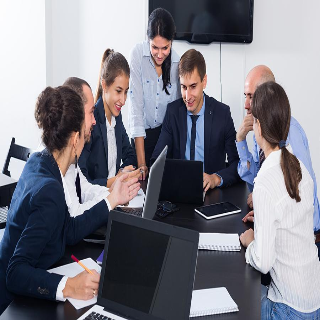

In [2202]:
imgr=cv2.resize(img,(320,320)) #RESIZING THE IMAGE for showing only
cv2_imshow(imgr)

Here,I MAKE MY IMAGE TO READY FOR YOYOV3

1-NORMALIZATION BY DIVIDING EACH PIXEL BY 255

2-RESIZING

3-CONVERT INTO RGB BECAUSE IMAGE IS IN THE FORMAT OF BGR WE HAVE TO CONVERT INTO RGB BY SWAPRB

In [2203]:
blob=cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False) 
blob.shape

(1, 3, 320, 320)

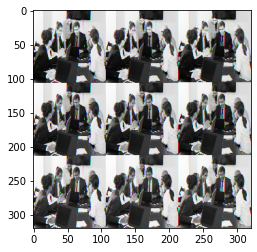

In [2204]:
img_rgb=blob[0].reshape(320,320,3)#PLOTTING BLOB IMAGE AND HERE WE CAN SEE 3 COLUMN IN IMAGE WHICH IS  FIRST  COLUMN IS R ,SECOND IS G AND THIRD IS B
plt.imshow(img_rgb)

In [2205]:
NNET.setInput(blob) #SETINPUT BY PASSING BLOB IN NNET

In [2206]:
output_layers_names=NNET.getUnconnectedOutLayersNames() #GETTING THE NAME OF ALL LAYER NAMES
layeroutput=NNET.forward(output_layers_names)
#print(type(layeroutput))


In [2207]:
boxes=[]
confidences=[]
class_ids=[]

for output in layeroutput:
  for detection in output:
    score=detection[5:]
    class_id=np.argmax(score)
    confidence=score[class_id]
    if confidence > 0.4:
      c_x=int(detection[0]*width)
      c_y=int(detection[1]*height)
      w=int(detection[2]*width)
      h=int(detection[3]*height)
      x=int(c_x-w)
      y=int(c_y-h)
      
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)



In [2208]:
len(boxes)

8

In [2209]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.3)#IT IS USED TO REMOVE DUPLICATE BOX IN THE boxes

In [2210]:
font=cv2.FONT_HERSHEY_PLAIN  #giving the font
colors=np.random.uniform(0,255,size=(len(boxes),3))  #giving the colour which should be uniform

In [2211]:
for i in indexes.flatten():
  x,y,w,h=boxes[i]
  label=str(classes[class_ids[i]])
  confidenc=str(round(confidences[i],2))
  color=colors[i]
  cv2.rectangle(img,(x,y),(x+w,y+h),color,2)   #rectangle form
  cv2.putText(img,label+""+confidenc,(x,y+20),font,2,(255,255,255),2)    

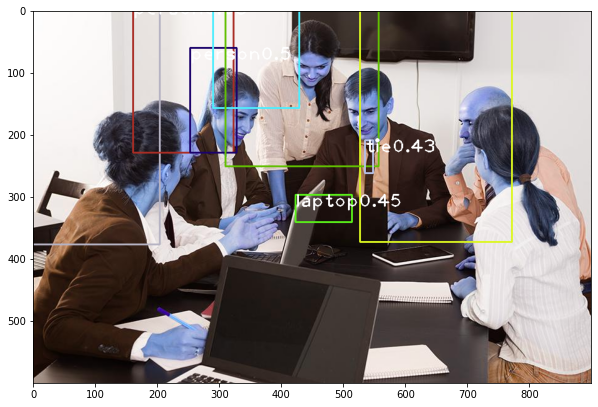

In [2212]:
plt.figure(figsize=(10,10))
plt.imshow(img)


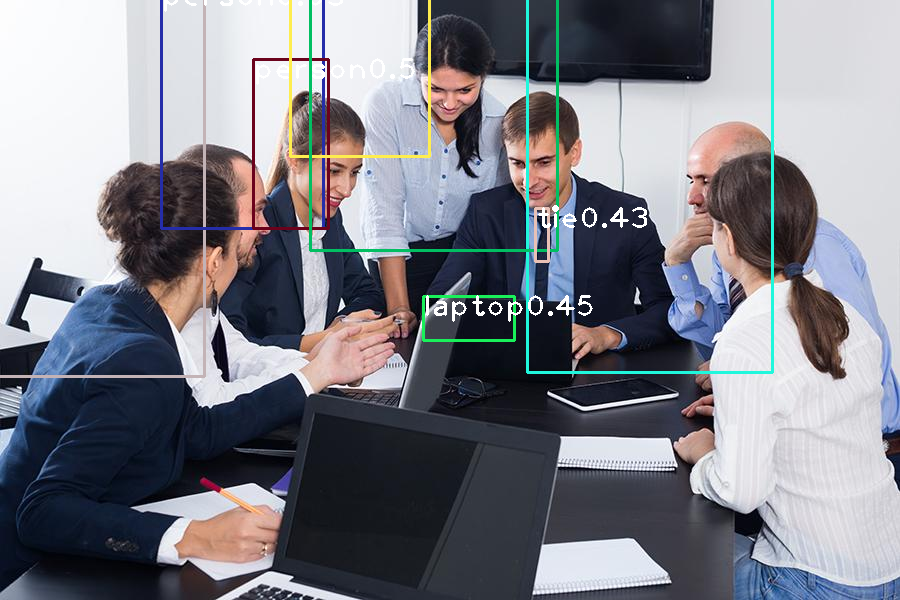

In [2213]:
cv2_imshow(img)